In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

In [3]:
print("Форма данных (shape):", df.shape)
print("\nПервые несколько строк данных (head):")
print(df.head())
print("\nОписание данных (describe):")
print(df.describe())
print("\nИнформация о данных (info):")
print(df.info())
print("\nКоличество пустых значений в каждом столбце:")
print(np.sum(df.isnull()))

Форма данных (shape): (2240, 29)

Первые несколько строк данных (head):
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp

C:\Users\Кирилл\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


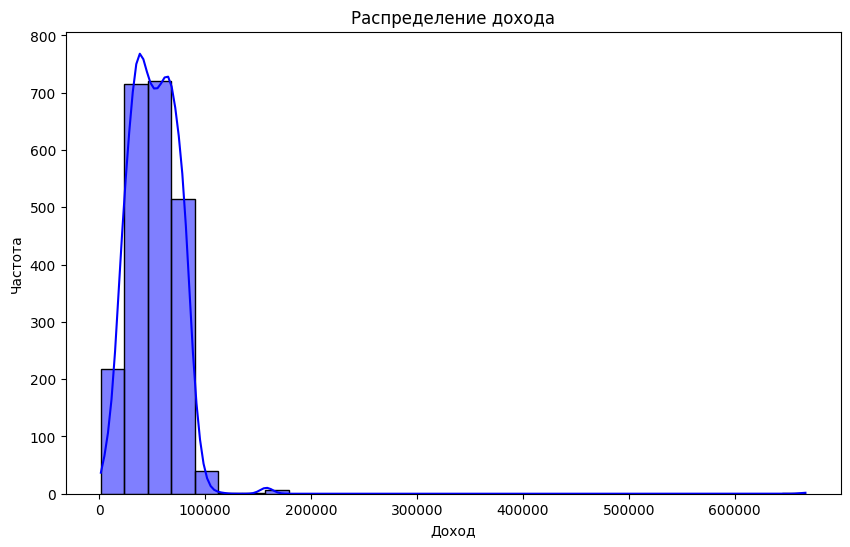

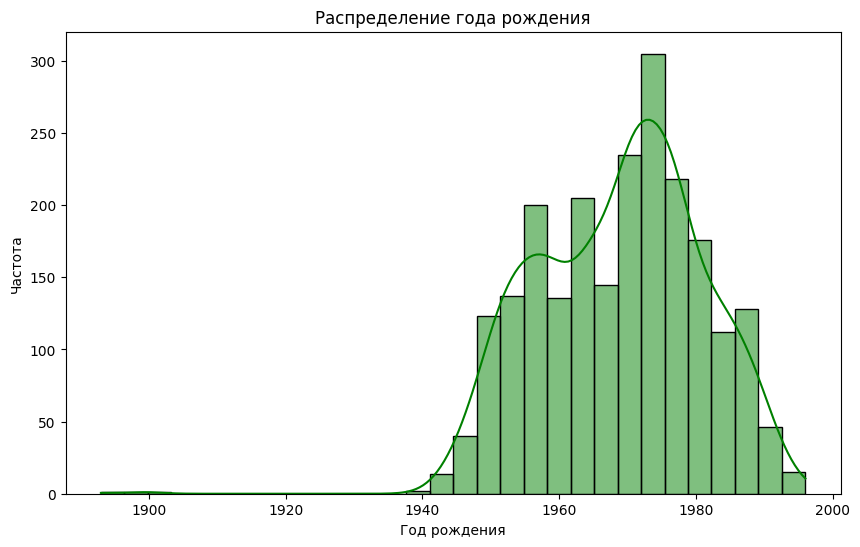

In [4]:
# Графики распределения признаков с помощью matplotlib
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Распределение дохода')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.show()

# Графики распределения признаков с помощью seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Year_Birth'], bins=30, kde=True, color='green')
plt.title('Распределение года рождения')
plt.xlabel('Год рождения')
plt.ylabel('Частота')
plt.show()

# Графики распределения признаков с помощью plotly
fig = px.histogram(df, x='Education', title='Распределение образования')
fig.show()

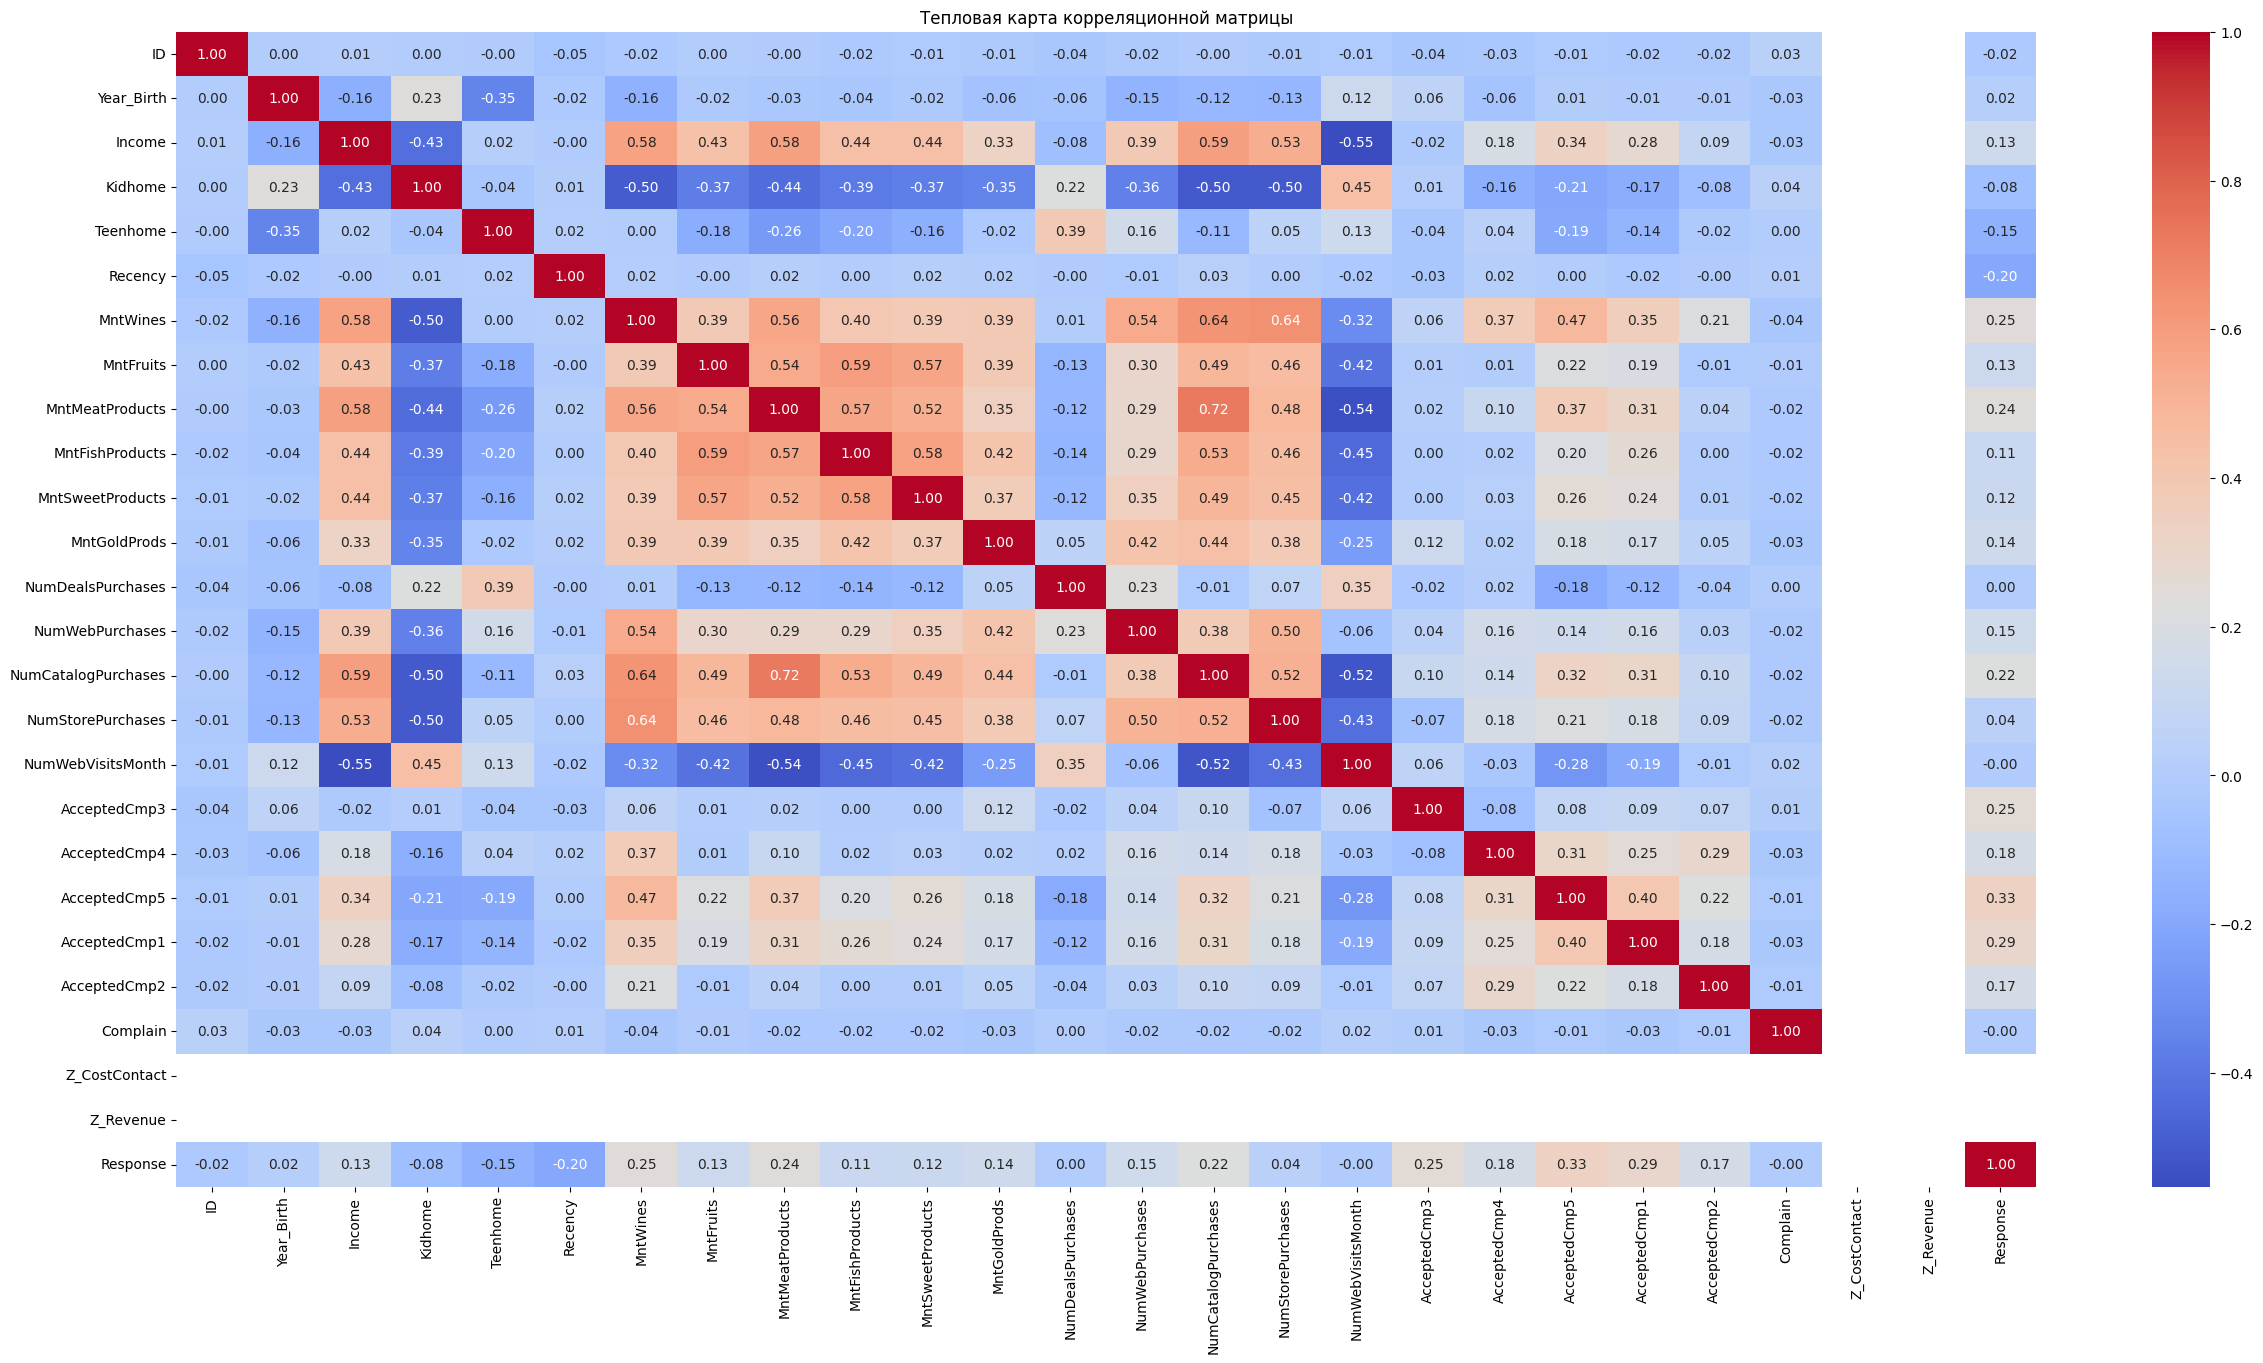

In [5]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

plt.figure(figsize=(30, 15))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляционной матрицы')
plt.show()



In [6]:
# Создание кодированных данных
categorical_columns = ['Marital_Status']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Удаляем ненужный столбец 'Dt_Customer'
df_encoded.drop(columns=['Dt_Customer'], inplace=True)


In [7]:
print(df_encoded.head())

     ID  Year_Birth   Education   Income  Kidhome  Teenhome  Recency  \
0  5524        1957  Graduation  58138.0        0         0       58   
1  2174        1954  Graduation  46344.0        1         1       38   
2  4141        1965  Graduation  71613.0        0         0       26   
3  6182        1984  Graduation  26646.0        1         0       26   
4  5324        1981         PhD  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  Z_CostContact  Z_Revenue  \
0       635         88              546  ...              3         11   
1        11          1                6  ...              3         11   
2       426         49              127  ...              3         11   
3        11          4               20  ...              3         11   
4       173         43              118  ...              3         11   

   Response  Marital_Status_Alone  Marital_Status_Divorced  \
0         1                 False                    False  

In [8]:
from sklearn.preprocessing import StandardScaler

# Преобразуем категориальные признаки в числовые значения
df_encoded = pd.get_dummies(df, columns=['Education'], drop_first=True)

# Удаляем ненужные столбцы, включая категориальные признаки и 'Dt_Customer'
columns_to_drop = ['Marital_Status', 'Dt_Customer']
df_encoded.drop(columns=columns_to_drop, inplace=True)

# Стандартизация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)
print(df_scaled.head())


         ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0 -0.020999   -0.985345  0.234063 -0.825218 -0.929894  0.307039  0.983781   
1 -1.053058   -1.235733 -0.234559  1.032559  0.906934 -0.383664 -0.870479   
2 -0.447070   -0.317643  0.769478 -0.825218 -0.929894 -0.798086  0.362723   
3  0.181716    1.268149 -1.017239  1.032559 -0.929894 -0.798086 -0.870479   
4 -0.082614    1.017761  0.240221  1.032559 -0.929894  1.550305 -0.389085   

   MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp1  \
0   1.551577         1.679702         2.462147  ...     -0.262111   
1  -0.636301        -0.713225        -0.650449  ...     -0.262111   
2   0.570804        -0.177032         1.345274  ...     -0.262111   
3  -0.560857        -0.651187        -0.503974  ...     -0.262111   
4   0.419916        -0.216914         0.155164  ...     -0.262111   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0      -0.11651 -0.097282            0.0        0.0  2.38

In [9]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Создание объекта PCA с указанием количества компонент
pca = PCA(n_components=2)

# Создание объекта SimpleImputer для заполнения пропущенных значений
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)

# Применение PCA к заполненным данным
principal_components = pca.fit_transform(df_imputed)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print(df_pca.head())


        PC1       PC2
0  3.794471 -0.750730
1 -2.321402 -0.112195
2  1.651365 -0.610101
3 -2.469759 -1.677428
4 -0.452858  0.349147


In [10]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"  
k = 3
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_imputed)
cluster_labels = kmeans.labels_
print(cluster_labels[:10])

[1 0 2 0 2 2 2 0 0 0]


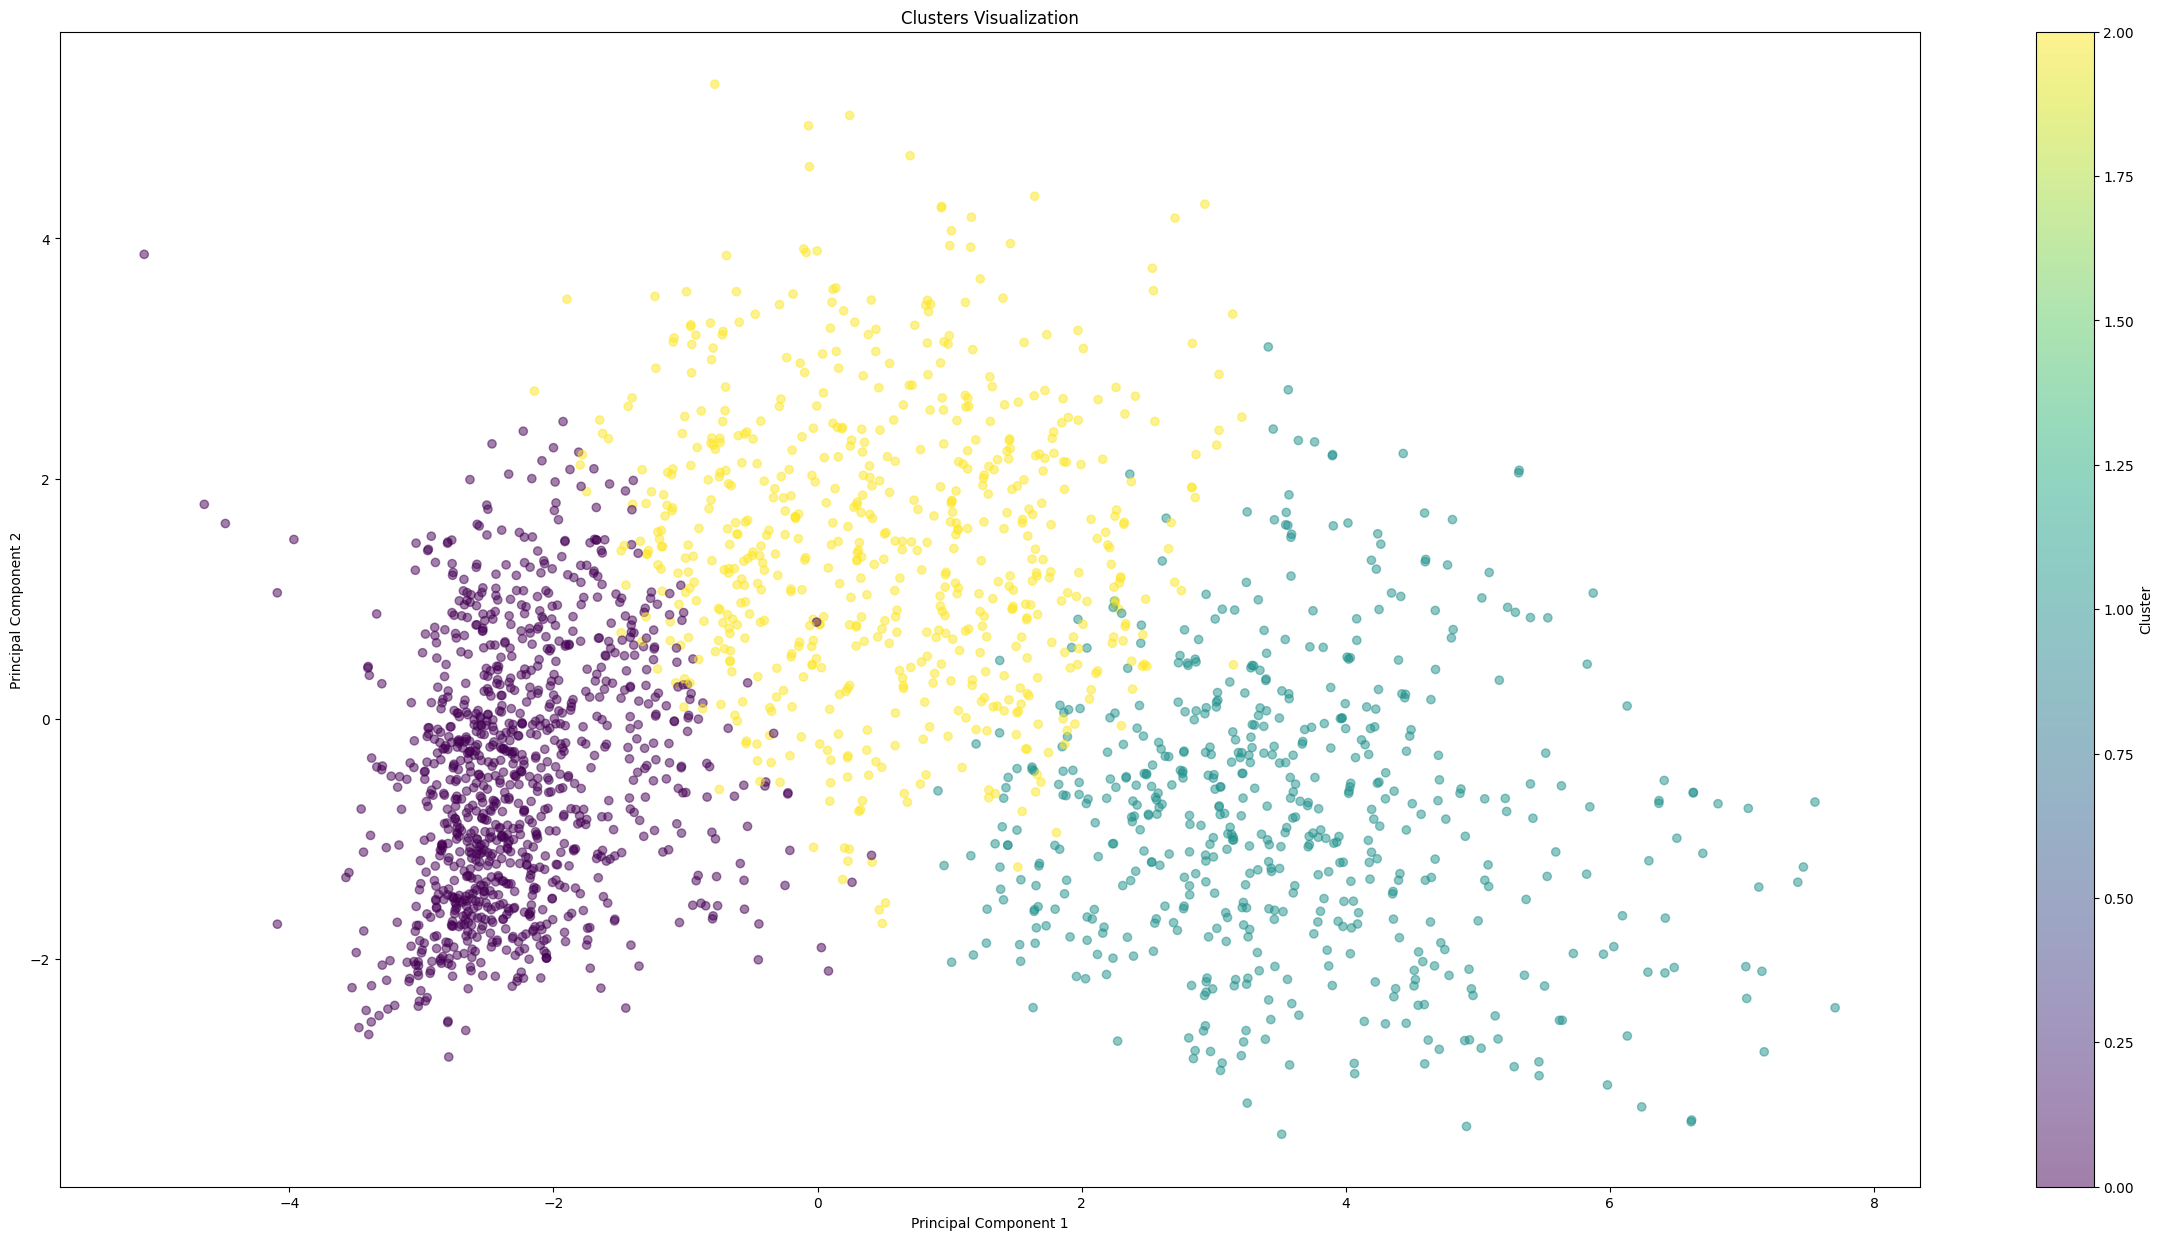

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
